In [1]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline
from tqdm import tqdm
import glob
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress

In [2]:
files = glob.glob('../BL_Work/openPrescribe/serialized/*.gz')
print files

['../BL_Work/openPrescribe/serialized/201603.gz', '../BL_Work/openPrescribe/serialized/201601.gz', '../BL_Work/openPrescribe/serialized/201602.gz', '../BL_Work/openPrescribe/serialized/201008.gz', '../BL_Work/openPrescribe/serialized/201012.gz', '../BL_Work/openPrescribe/serialized/201011.gz', '../BL_Work/openPrescribe/serialized/201009.gz', '../BL_Work/openPrescribe/serialized/201010.gz']


In [3]:
pdp = pd.read_csv(files[-1],compression='gzip')

In [4]:
GP_postcodes_long = {}
for name , group in pdp.groupby('2'):
    postcode = list(set(group['10']))
    GP_postcodes_long[name] = str(postcode[0]).strip()

In [5]:
ward_df = pd.read_csv('../BL_Work/pcd11_par11_wd11_lad11_ew_lu.csv')

/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (5,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
ward_df.head()

,pcd7,pcd8,pcds,par11cd,par11nm,par11nmw,wd11cd,wd11nm,wd11nmw,lad11cd,lad11nm,lad11nmw
0,AL1 1AG,AL1 1AG,AL1 1AG,NaN,NaN,NaN,E05004802,Sopwell,NaN,E07000100,St Albans,NaN
1,AL1 1AJ,AL1 1AJ,AL1 1AJ,NaN,NaN,NaN,E05004802,Sopwell,NaN,E07000100,St Albans,NaN
2,AL1 1AR,AL1 1AR,AL1 1AR,NaN,NaN,NaN,E05004789,Cunningham,NaN,E07000100,St Albans,NaN
3,AL1 1AS,AL1 1AS,AL1 1AS,NaN,NaN,NaN,E05004799,St Peters,NaN,E07000100,St Albans,NaN
4,AL1 1BH,AL1 1BH,AL1 1BH,NaN,NaN,NaN,E05004802,Sopwell,NaN,E07000100,St Albans,NaN


In [7]:
ward_postcode_map = {}
for name, group in ward_df.groupby('wd11cd'):
    ward_postcode_map[name] = list(group['pcds'])
    

In [28]:
%store -r presc_Disease_prevalence

no stored variable presc_Disease_prevalence


In [18]:
luca_data = pd.read_csv('../BL_Work/diabetes_estimates_osward_2016.csv')

In [19]:
ward_gt = {}
ward_luca_predict = {}
ward_patients_gt = {}
for index , row in luca_data.iterrows():
    ward_gt[row['osward']] = float(row['gp_patients_diabetes'])
    ward_patients_gt[row['osward']] = float(row['gp_patients'])
    ward_luca_predict[row['osward']] = row['diabetes_prevalence_estimated_from_prescriptions']

(array([  7.,  68., 158., 164., 108.,  53.,  31.,  12.,   0.,   2.]),
 array([   5. ,  220.2,  435.4,  650.6,  865.8, 1081. , 1296.2, 1511.4,
        1726.6, 1941.8, 2157. ]),
 <a list of 10 Patch objects>)

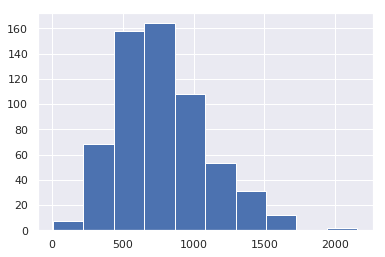

In [20]:
plt.hist(ward_gt.values())

In [21]:
pearsonr([ward_gt[k] for k in ward_gt],[ward_luca_predict[k] for k in ward_gt])

(0.7203983722552026, 1.3988923480224664e-97)

In [22]:
# ward_postcode_map

In [23]:
londonWardPostcode = {k : ward_postcode_map[k] for k in ward_gt if k in ward_postcode_map}

In [24]:
len(londonWardPostcode), len(ward_gt)

(540, 603)

In [27]:
diabetes_GP = presc_Disease_prevalence['201009']['diabetes']

NameError: name 'presc_Disease_prevalence' is not defined

In [26]:
# %store -r GP_postcodes

In [ ]:
patients = pd.read_csv('../BL_Work/grondTruths/GP_SYOA.csv')
practice_patient_dict = {}
for index , row in patients.iterrows():
    practice_patient_dict[row['PRACTICE_CODE']] = row['Total_All']

In [ ]:
patients_survey = pd.read_csv('../BL_Work/prevalence/DM.csv')
practice_surveypatient_dict = {}
for index , row in patients_survey.iterrows():
    practice_surveypatient_dict[row['practice_code']] = row['survey_takers']


In [ ]:
practice_patient_dict

In [ ]:
common_GPs = set(practice_patient_dict.keys()).intersection(practice_surveypatient_dict.keys())

In [ ]:
# common_GPs

In [ ]:
pearsonr([practice_surveypatient_dict[k] for k in common_GPs],[practice_patient_dict[k] for k in common_GPs])

In [ ]:
patients.head()

In [ ]:
ward_patients = {}
for k in GP_postcodes_long:
    postCode = GP_postcodes_long[k]
    for ward in londonWardPostcode:
        if postCode in londonWardPostcode[ward]:
            try:
                if ward not in ward_patients:
                    ward_patients[ward] = practice_surveypatient_dict[k]
                else:
                    ward_patients[ward] += practice_surveypatient_dict[k]
            except:
                continue

ward_patients_filtered = {k: ward_patients[k] for k in ward_patients if not np.isnan(ward_patients[k] )}

In [ ]:
%store ward_patients_filtered

In [ ]:
pearsonr([ward_patients_gt[k] for k in ward_patients_filtered],[ward_patients_filtered[k] for k in ward_patients_filtered])

In [ ]:
len(ward_patients)

In [ ]:
filteredGPs = list(set(diabetes_GP.keys()).intersection(practice_surveypatient_dict.keys()).intersection(GP_postcodes_long.keys()))


In [ ]:
# for index, row in  luca_data.iterrows():
#     if row['osward'] in ward_patients:
#         print ward_patients[row['osward']] , row['gp_patients']

In [ ]:
ward_diabetes_prevalence= {}
ward_gp_prevalence = {}
for ward in ward_patients_filtered:
    for k in filteredGPs:
        postCode = GP_postcodes_long[k]
        if ward not in ward_gp_prevalence:
            ward_gp_prevalence[ward] = []
        if postCode in londonWardPostcode[ward]:
            ward_gp_prevalence[ward].append(float(diabetes_GP[k])*float(practice_surveypatient_dict[k]))
for ward in ward_gp_prevalence:
    ward_diabetes_prevalence[ward] = float(np.sum(ward_gp_prevalence[ward]))/float(ward_patients_filtered[ward]+1)


    

In [ ]:
plt.hist(ward_diabetes_prevalence.values())

In [ ]:
len(ward_diabetes_prevalence)

In [ ]:
from sklearn import preprocessing

In [ ]:
pearsonr([ward_gt[k] for k in ward_diabetes_prevalence],[ward_diabetes_prevalence[k] for k in ward_diabetes_prevalence])